# Detector response to 9 MeV gammas (nuPRISMShort_mPMT)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.patches import Ellipse

### Read in the simulated PMT responses
The ROOT script `read_PMT.C` prints key information from the ROOT file output by Geant4. This can then be read in as a Pandas DataFrame and saved in a compressed .h5 file.

In [2]:
!wget https://www.dropbox.com/s/buh21gbm07xy1dz/nuPRISMShort_mPMT_10k.h5

--2021-03-27 01:31:13--  https://www.dropbox.com/s/buh21gbm07xy1dz/nuPRISMShort_mPMT_10k.h5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.68.18, 2620:100:6024:18::a27d:4412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.68.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/buh21gbm07xy1dz/nuPRISMShort_mPMT_10k.h5 [following]
--2021-03-27 01:31:14--  https://www.dropbox.com/s/raw/buh21gbm07xy1dz/nuPRISMShort_mPMT_10k.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccf177951462a8ebe57fa483eaf.dl.dropboxusercontent.com/cd/0/inline/BLcDdhLVn0mGmU9NzNj2ZO7gCUoBgvJ5ik_eD0rd6rnM4hF0FdYWnUOEVYL0qHJf5biYr-skFuskynETJd70JFNVaZsrhAXeSTwuszWvAH-zkDIx7lipqHgvQ8WDYhTJQYw2dZ-WI4SSfy8FaScdUe64/file# [following]
--2021-03-27 01:31:14--  https://uccf177951462a8ebe57fa483eaf.dl.dropboxusercontent.com/cd/0/inline/BLcDdhLVn0mGmU9NzNj2ZO7gCUoBgvJ5ik_eD0rd6rnM4hF0FdY

In [3]:
initial_read = False
h5file = 'nuPRISMShort_mPMT_10k.h5'

if(initial_read):
    
    # Read files containing the PMT coordinates and the simulated hits into Pandas dataframes.
    print("Reading files into dataframes...")
    df_pmt     = pd.read_csv('/home/jrenner/local/hk/WCSim/WCSim_build/nuPRISMShort_mPMT_geom.dat', delimiter = " ")
    df_photons = pd.read_csv('/home/jrenner/local/hk/WCSim/WCSim_build/nuPRISMShort_mPMT_hits_9MeV_10k.dat', delimiter = " ")

    # Output the dataframes to HDF5.
    print("Outputting files to HDF5...")
    df_pmt.to_hdf(h5file,key='pmts',complevel=9,complib='zlib')
    df_photons.to_hdf(h5file,key='photons',complevel=9,complib='zlib')

else:
    
    # Read the dataframes from HDF5.
    print("Reading the dataframes from HDF5...")
    df_pmt = pd.read_hdf(h5file,key='pmts')
    df_photons = pd.read_hdf(h5file,key='photons')

Reading the dataframes from HDF5...


In [4]:
# Show a few rows of the PMTs dataframe.
df_pmt.head()

,pmt,loc,x,z,y,dx,dz,dy
0,1,1,395.711,164.428,31.1431,-0.806523,-5.877850e-01,-0.063475
1,2,1,395.079,166.586,39.1710,-0.829582,-5.090370e-01,0.229512
2,3,1,394.617,172.481,45.0477,-0.846462,-2.938930e-01,0.443993
3,4,1,394.447,180.533,47.1988,-0.852640,-5.353570e-17,0.522499
4,5,1,394.617,188.586,45.0477,-0.846462,2.938930e-01,0.443993


In [5]:
# Show a few rows of the photons dataframe.
df_photons.head()

,evt,ntriggers,pmt1,pmt2,pmt3,pmt4,pmt5,pmt6,pmt7,pmt8,...,pmt10176,pmt10177,pmt10178,pmt10179,pmt10180,pmt10181,pmt10182,pmt10183,pmt10184,Unnamed: 10186
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [6]:
# Compute key quantities for each PMT, including the mean number of photons per event.
N = len(df_photons)
pmt_mu, pmt_err, pmt_r, pmt_phi = [], [], [], []
print("Processing",N,"events...")
for npmt in range(10184):
    pmtID = npmt+1
    tag = 'pmt{}'.format(pmtID)
    x = df_pmt[df_pmt.pmt == pmtID]['x'].values[0]    
    y = df_pmt[df_pmt.pmt == pmtID]['y'].values[0]    
    z = df_pmt[df_pmt.pmt == pmtID]['z'].values[0]    
    
    pmt_mu.append(df_photons[tag].mean())
    pmt_err.append(df_photons[tag].std()/np.sqrt(N))
    pmt_r.append(np.sqrt(x**2 + y**2 + z**2))
    pmt_phi.append(np.arctan2(y,x))

Processing 10000 events...


In [7]:
# Add the computed quantities to the PMT dataframe.
df_pmt['mu_photons'] = pmt_mu
df_pmt['err_photons'] = pmt_err
df_pmt['r'] = pmt_r
df_pmt['phi'] = pmt_phi

## Plots

In [8]:
# A binned profile plot.
def profile_plot(X,Y,Yerr=None,nbins=10):
    
    # Use 1's for Yerr if none specified.
    if(Yerr is None):
        Yerr = np.ones(len(X))
    
    # Compute the bins.
    xmax = np.max(X)
    xmin = np.min(X)
    wbin = (xmax - xmin)/nbins
    xvals = np.arange(xmin,xmax,wbin) + wbin/2  # bin centers
    xerrs = np.ones(len(xvals))*wbin/2
    
    # Bin the values.
    nentries = np.zeros(nbins)
    yvals = np.zeros(nbins)
    yerrs = np.zeros(nbins)
    for xx,yy,yye in zip(X,Y,Yerr):
        nbin = int((xx - xmin)/wbin)
        if(nbin == nbins): nbin = nbins-1   # place xmax value in last bin
        yvals[nbin] += yy
        yerrs[nbin] += yye**2
        nentries[nbin] += 1
    
    # Normalize.
    yvals /= nentries
    yerrs = np.sqrt(yerrs)/nentries
    
    return xvals,xerrs,yvals,yerrs

Text(0, 0.5, 'SPE probability')

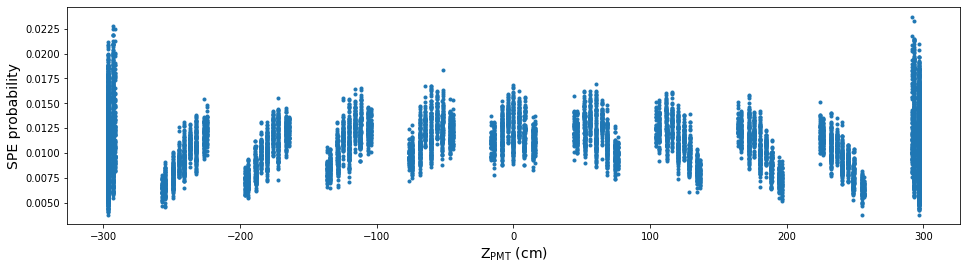

In [9]:
# Unbinned plot of mean number of events per PMT vs. PMT z.
fig = plt.figure()
fig.set_figheight(4.0)
fig.set_figwidth(16.0)
plt.plot(df_pmt['z'].values,df_pmt['mu_photons'].values,'.')
plt.xlabel("Z$_{\mathrm{PMT}}$ (cm)",fontsize=14)
plt.ylabel("SPE probability",fontsize=14)


Text(0, 0.5, 'SPE probability')

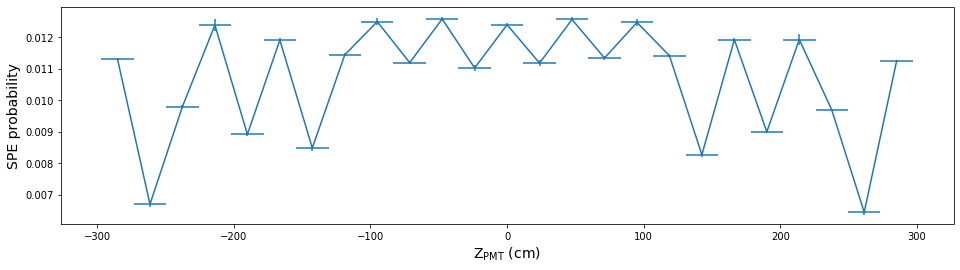

In [10]:
# Binned (profile) plot of mean number of events per PMT vs. PMT z.
fig = plt.figure()
fig.set_figheight(4.0)
fig.set_figwidth(16.0)
xvals,xerrs,yvals,yerrs = profile_plot(df_pmt['z'].values,df_pmt['mu_photons'].values,df_pmt['err_photons'].values,25)
plt.errorbar(xvals,yvals,xerr=xerrs,yerr=yerrs)
plt.xlabel("Z$_{\mathrm{PMT}}$ (cm)",fontsize=14)
plt.ylabel("SPE probability",fontsize=14)

In [11]:
# An "event display"-style PMT plot.
def pmts_plot(dfpmt, rxy=300, zlim=285, margin=20):
    
    ell_radius = 2
    x = dfpmt['x'].values
    y = dfpmt['y'].values
    z = dfpmt['z'].values
    spe = dfpmt['mu_photons'].values
    phi = np.arctan2(y,x) + np.pi
    
    cmap = matplotlib.cm.get_cmap('jet')
    
    spe_max = np.max(spe)
    spe_min = np.min(spe)
    rxy = 300
    x_uw = rxy*phi
    
    fig = plt.figure()
    fig.set_figheight(18.0)
    fig.set_figwidth(21.0)
    
    ax_cbar = fig.add_subplot(3,12,10)
    cbar = matplotlib.colorbar.ColorbarBase(ax_cbar, cmap=cmap,
                       norm=matplotlib.colors.Normalize(vmin=spe_min, vmax=spe_max))
    
    # Plot the upper lid.
    x_ulid = x[z > zlim]
    y_ulid = y[z > zlim]
    spe_ulid = spe[z > zlim]
    ax_ulid = fig.add_subplot(3,3,2)
    ax_ulid.set_xlim(np.min(x_ulid)-margin,np.max(x_ulid)+margin)
    ax_ulid.set_ylim(np.min(y_ulid)-margin,np.max(y_ulid)+margin)
    ax_ulid.set_title("UPPER LID")
    ax_ulid.set_xlabel("x (cm)")
    ax_ulid.set_ylabel("y (cm)")
    for xplt,yplt,prob in zip(x_ulid,y_ulid,spe_ulid):
        col = cmap((prob - spe_min)/(spe_max - spe_min))
        ellipse = Ellipse((xplt, yplt), width=ell_radius * 2, height=ell_radius * 2, facecolor=col)
        ax_ulid.add_patch(ellipse)
    
    # Plot the cylinder
    xuw_cyl = x_uw[(z < zlim) & (z > -zlim)]
    z_cyl = z[(z < zlim) & (z > -zlim)]
    spe_cyl = spe[(z < zlim) & (z > -zlim)]
    ax_cyl = fig.add_subplot(3,1,2)
    ax_cyl.set_xlim(np.min(xuw_cyl)-margin,np.max(xuw_cyl)+margin)
    ax_cyl.set_ylim(np.min(z_cyl)-margin,np.max(z_cyl)+margin)
    ax_cyl.set_title("CYLINDER")
    ax_cyl.set_xlabel("distance along cylinder (cm)")
    ax_cyl.set_ylabel("z (cm)")
    for xplt,yplt,prob in zip(xuw_cyl,z_cyl,spe_cyl):
        col = cmap((prob - spe_min)/(spe_max - spe_min))
        ellipse = Ellipse((xplt, yplt), width=ell_radius * 2, height=ell_radius * 2, facecolor=col)
        ax_cyl.add_patch(ellipse)
        
    # Plot the lower lid.
    x_llid = x[z < -zlim]
    y_llid = y[z < -zlim]
    spe_llid = spe[z < -zlim]
    ax_llid = fig.add_subplot(3,3,8)
    ax_llid.set_xlim(np.min(x_llid)-margin,np.max(x_llid)+margin)
    ax_llid.set_ylim(np.min(y_llid)-margin,np.max(y_llid)+margin)
    ax_llid.set_title("LOWER LID")
    ax_llid.set_xlabel("x (cm)")
    ax_llid.set_ylabel("y (cm)")
    for xplt,yplt,prob in zip(x_llid,y_llid,spe_llid):
        col = cmap((prob - spe_min)/(spe_max - spe_min))
        ellipse = Ellipse((xplt, yplt), width=ell_radius * 2, height=ell_radius * 2, facecolor=col)
        ax_llid.add_patch(ellipse)

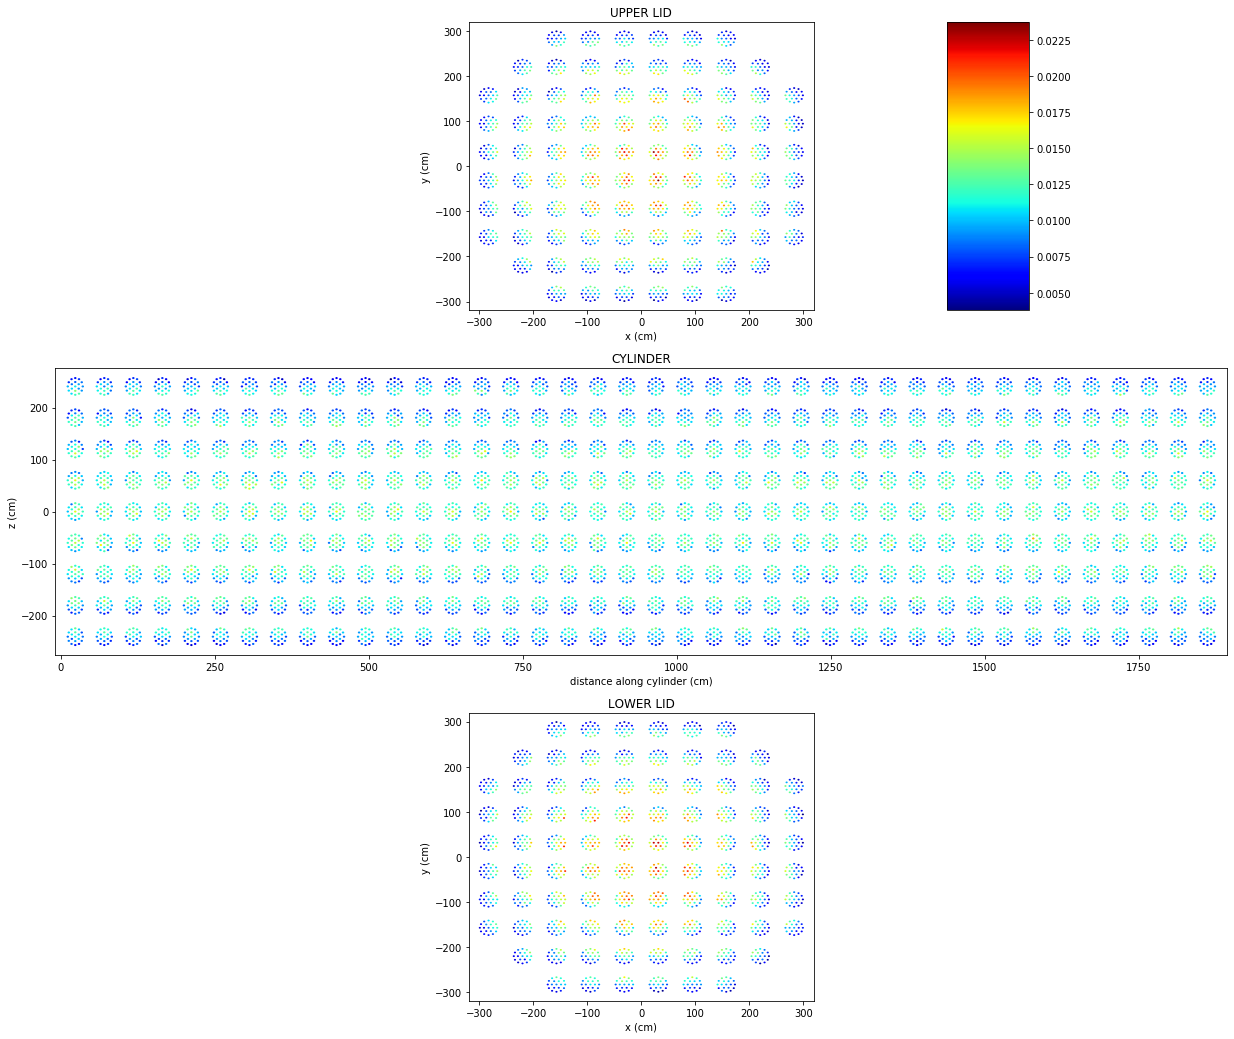

In [12]:
pmts_plot(df_pmt)